In [1]:
import numpy as np
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display, Math

1. Show that matrix multiplication distributes over matrix addition:                              
show A(B+C)=AB+AC assuming that A,B, and C are matrices of compatible size.

In [2]:
# Create matrices A, B, and C
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6], 
              [7, 8]])

C = np.array([[9, 10], 
              [11, 12]])

result1 = A.dot(B + C)              # Calculate A(B + C)
result2 = A.dot(B) + A.dot(C)       # Calculate AB + AC

# Compare the results
display(Math(r'A(B + C) = '+latex(Matrix(result1))))
display(Math(r'AB + AC = '+latex(Matrix(result2))))

print("Are the results equal?", np.array_equal(result1, result2)) # Check if the results are equal

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Are the results equal? True


2. Write a function `my_is_orthogonal(v1,v2, tol)`, where $v_1$ and $v_2$ are column vectors of the same size and tol is a scalar value strictly larger than $0$. The output should be $1$ if the angle between $v_1$ and $v_2$ is within tol of $\frac{\pi}{2}$ ;                               
that is, |$\frac{\pi}{2}-\theta$| $<$ tol , and $0$ otherwise.                                 
You may assume that $v_1$ and $v_2$ are column vectors of the same size, and that tol is a positive scalar.

In [3]:
def my_is_orthogonal(v1, v2, tol):
    dot_product = np.dot(v1.T, v2)  # Calculate the dot product of v1 and v2
    norm_product = np.linalg.norm(v1) * np.linalg.norm(v2)  # Calculate the product of their norms
    angle = np.arccos(dot_product / norm_product)  # Calculate the angle between v1 and v2

    if np.abs(angle - np.pi/2) < tol:  # Check if the angle is within the tolerance
        return 1
    else:
        return 0

In [4]:
# Test cases for problem 2
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

my_is_orthogonal(a,b, 0.01)

1

In [5]:
my_is_orthogonal(a,b, 0.001)

0

In [6]:
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
my_is_orthogonal(a,b, 0.01)

0

In [7]:
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
my_is_orthogonal(a,b, 1e-10)

1

3. Write a function `my_is_similar(s1,s2,tol)` where $s_1$ and $s_2$ are strings, not necessarily the same size, and tol is a scalar value strictly larger than 0. From $s_1$ and $s_2$, the function should construct two vectors, $v_1$ and $v_2$, where $v_1[0]$ is the number of ‘a’s in $s_1, v_1[1]$ is the number ‘b’s in $s_1$, and so on until $v_1[25]$, which is the number of ‘z’s in $v_1$. The vector $v_2$ should be similarly constructed from $s_2$. The output should be $1$ if the absolute value of the angle between $v_1$ and $v_2$ is less than tol; that is, |$\theta$|<tol .

In [8]:
def my_is_similar(s1, s2, tol):
    # Construct character frequency vectors for s1 and s2
    v1 = np.zeros(26, dtype=int)
    v2 = np.zeros(26, dtype=int)

    # Count character occurrences in s1
    for char in s1:
        if char.isalpha():
            v1[ord(char.lower()) - ord('a')] += 1

    # Count character occurrences in s2
    for char in s2:
        if char.isalpha():
            v2[ord(char.lower()) - ord('a')] += 1

    # Compute the absolute angle between v1 and v2
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    theta = np.arccos(cos_theta)
    abs_theta = np.abs(theta)

    # Check if the absolute angle is less than tol
    if abs_theta < tol:
        return 1
    else:
        return 0

In [9]:
s1 = "Hello"
s2 = "Holle"
tol = 0.1

result = my_is_similar(s1, s2, tol)
print(result)

1


4. Write a function `my_make_lin_ind(A)` where A and B are matrices. Let rank(A) = n.                                    
Then B should be a matrix containing the first n columns of A that are all linearly independent. Note that this implies that B has full rank.

In [10]:
def my_make_lin_ind(A):
    
    B = []    # Initialize an empty list to store the linearly independent columns
    # Iterate through the columns of A
    for col in A.T:
        # Check if the current column is linearly independent from the columns in B
        if np.all(np.linalg.matrix_rank(np.column_stack(B + [col])) == len(B) + 1):
            B.append(col)
            
    # Convert the list of columns into a numpy array
    B = np.column_stack(B)
    return B

In [11]:
A = np.array([[12,24,0,11,-24,18,15],
              [19,38,0,10,-31,25, 9],
              [ 1, 2,0,21, -5, 3,20],
              [ 6,12,0,13,-10, 8, 5],
              [22,44,0, 2,-12,17,23]])
my_make_lin_ind(A)

array([[ 12,  11, -24,  15],
       [ 19,  10, -31,   9],
       [  1,  21,  -5,  20],
       [  6,  13, -10,   5],
       [ 22,   2, -12,  23]])

5. Cramer’s rule is a method of computing the determinant of a matrix. Consider an n×n square matrix M.                   
Let $M(i, j)$ be the element of M in the $i^{th}$ row and $j^{th}$ column of M,                                             
and let $m_{i,j}$ be the minor of M created by removing the $i^{th}$ row and $j^{th}$ column from M.                          
Cramer’s rule says that

$\qquad\qquad\displaystyle{ \det(M) =\sum^n_{i=1} (−1)^{i−1}M(1, i) \det(m_{i,j} )}$

Write a function `my_rec_det(M)` where the output is det(M). Use Cramer’s rule to compute the determinant, not NumPy’s function.

In [12]:
def my_rec_det(M):
    n = len(M)

    # Base case: determinant of 1x1 matrix is the single element
    if n == 1:
        return M[0, 0]

    determinant = 0

    # Iterate over the first row of the matrix
    for j in range(n):
        # Calculate the minor matrix by removing the first row and current column
        minor = M[1:, np.arange(n) != j]

        # Recursively calculate the determinant of the minor matrix
        minor_det = my_rec_det(minor)

        # Add the term (-1)^(i+j) * M(1, i) * det(m_{i,j}) to the determinant
        determinant += (-1) ** (1 + j) * M[0, j] * minor_det
    return determinant

In [13]:
M = np.array([[1,-2, 3],
              [2, 0, 3],
              [1, 5, 4]])

my_rec_det(M)

25

6. What is the complexity of `my_rec_det` in the previous problem?                                                             
Do you think this is an effective way of determining if a matrix is singular or not?

The complexity of the `my_rec_det function` using Cramer's rule is $O(n!)$ because it involves computing the determinant of each minor matrix recursively.                                                                                                
Since there are n! possible minors, the time complexity grows factorially with the size of the matrix.

In terms of determining if a matrix is singular or not, using Cramer's rule to compute the determinant may not be the most efficient approach.                                                                                                       
The factorial time complexity makes it impractical for large matrices. Moreover, the computation of determinants using Cramer's rule can be numerically unstable, leading to inaccurate results due to accumulated round-off errors.

7. Let $p$ be a vector with length $L$ containing the coefficients of a polynomial of order $L −1.$                           
For example, the vector $p = [1, 0, 2]$ is a representation of the polynomial $f (x) = 1x^2 +0x + 2.$                         
Write a function `my_poly_der_mat(p)` where $p$ is the aforementioned vector, and the output $D$ is the matrix that will return the coefficients of the derivative of p when p is left multiplied by $D.$ For example, the derivative of $f (x)$ is $f'(x) = 2x;$ therefore, $d = Dp$ should yield $d = [2, 0].$                                                                   
Note this implies that the dimension of $D$ is $L− 1×L.$                                                                      
The point of this problem is to show that differentiating polynomials is actually a linear transformation.

In [14]:
def my_poly_der_mat(p):
    L = len(p)                # Length of the coefficient vector p
    D = np.zeros((L - 1, L))  # Initialize the differentiation matrix D

    # Compute the differentiation matrix
    for i in range(L - 1):
        D[i, i] = (L - 1) - i
    return D

In [15]:
p = [1, 0, 2]
D = my_poly_der_mat(p)
d = np.dot(D,p)
d

array([2., 0.])

8. Use the Gauss elimination method to solve the following equations:                                                          
$\qquad 3x_1 − x_2 +4x_3 = 2,$                                                                                                            
$\qquad 17x_1 + 2x_2 +x_3 = 14,$                                                                                                        
$\qquad x_1 +12x_2 −7x_3 = 54.$

In [16]:
def gauss_elm(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b)).astype(float)                  #augmented_mat
    print('\nGaussian elimination (with Pivotting):\n$ Original augmented matrix $')
    display(Math(r'A|B = '+latex(Matrix(M))))
    def swaprows(v,i,j):
        if len(v.shape) == 1: v[i],v[j] = v[j],v[i]
        else:   v[[i,j],:] = v[[j,i],:]
    s = np.zeros(n)
    for i in range(n):  s[i] = max(np.abs(M[i,:]))
    for k in range(n):       
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k   # row interchange, if needed
        if p != k: swaprows(M,k,p)
        for j in range(k+1,n):  
            q = float(M[j][k]) / M[k][k]        # lambda
            for m in range(k, n+1): M[j][m] -=  q * M[k][m] # Forward Elimination 

    display(Math(r'A|B = '+latex(Matrix(np.round(M,2)))))
    x = np.zeros(n)
    print('# From Backwards Substitution:')      
    x[n-1] =float(M[n-1][n]) / M[n-1][n-1]  
    for i in range (n-1,-1,-1):                         # Backwards Substitution         
        z = 0.0                                     
        for j in range(i+1,n): z = z  + float(M[i][j])*x[j]   
        x[i] = float(M[i][n] - z) / M[i][i]
        display(Math(r'\qquad\qquad x_{%i} = '%(i+1)+latex(np.round(x[i],4))))
    display(Math(r'X = '+latex(Matrix(np.round(x,4)))))
    print('# checking if AX == b :')
    display(Math('A\cdot X = '+latex(Matrix(np.round(np.dot(a,x.reshape(n,1)),2)))))
    return None

In [17]:
A = np.array([[ 3., -1., 4.],
              [17.,  2., 1.],
              [ 1., 12.,-7.]])

b = np.array([2.,14.,54.])

gauss_elm(A, b)
print('**************************************************************')
print("direct read using numpy.linalg.solve()")
display(Math(r'X=A^{-1}\cdot B = '+latex(Matrix(np.round(np.linalg.solve(A, b),4)))))
print('**************************************************************')


Gaussian elimination (with Pivotting):
$ Original augmented matrix $


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# From Backwards Substitution:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

**************************************************************


9. Use the Gauss–Jordan elimination method to solve the equations in Problem 8.

In [18]:
def gauss_jordan(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b)).astype(float)                      #augmented_mat
    print('\n Gauss Jordan elimination:\n$ Original augmented matrix $')
    display(Math(r'A|B = '+latex(Matrix(M))))
    ol = [[0, m - 1, 1], [m - 1, 0, -1]]               #outer_loop
    for d in range(2):
        for i in range(ol[d][0], ol[d][1], ol[d][2]):
            il = [[i + 1, m, 1], [i - 1, -1, -1]]                #inner_loop
            for j in range(il[d][0], il[d][1], il[d][2]):
                k = (-1) * M[j, i] / M[i, i]
                temp_row = M[i, :] * k
                M[j, :] += temp_row
    for i in range(0, m):
        M[i, :] = M[i, :] / M[i, i]
    print('# Normalizing the rows')
    display(Math(r'A|B = '+latex(Matrix(np.round(M,2)))))
    print("# Now on extracting the %ith column from the above matrix we get X :"%(n+1))
    display(Math(r'X = '+latex(Matrix(np.round(M[:, n],4)))))
    print('# checking if AX == b :')
    display(Math(r'A\cdot X = '+latex(Matrix(np.round(np.dot(a,(M[:, n]).reshape(n,1)),2)))))
    return None

In [19]:
A = np.array([[ 3., -1., 4.],
              [17.,  2., 1.],
              [ 1., 12.,-7.]])

b = np.array([2.,14.,54.])
gauss_jordan(A, b)
print('**************************************************************')
print("direct read using numpy.linalg.solve()")
display(Math(r'X=A^{-1}\cdot B = '+latex(Matrix(np.round(np.linalg.solve(A, b),4)))))
print('**************************************************************')


 Gauss Jordan elimination:
$ Original augmented matrix $


<IPython.core.display.Math object>

# Normalizing the rows


<IPython.core.display.Math object>

# Now on extracting the 4th column from the above matrix we get X :


<IPython.core.display.Math object>

# checking if AX == b :


<IPython.core.display.Math object>

**************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

**************************************************************


10. Obtain the lower triangular matrix L and upper triangular matrix U from the equations in Problem 8.

In [20]:
def lu_decomposition(a):
    n = a.shape[0]
    L = np.eye(n, dtype=np.double)
    U = np.copy(a)

    for k in range(n - 1):
        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]
    display(Math(r'L = '+latex(Matrix(np.round(L,4)))))
    display(Math(r'U = '+latex(Matrix(np.round(U,4))))) 
    display(Math(r'L\cdot U = '+latex(Matrix(np.round(np.dot(L,U),4)))))
    return None

In [21]:
A = np.array([[ 4., 3., -5.],
              [-2.,-4.,  5.],
              [ 8., 8.,  0.]])
lu_decomposition(A)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

11. Show that the dot-product distributes across vector addition, that is, show that $u\cdot (v+w) = u\cdot v +u\cdot w$

In [22]:
def dot_product_distributive(u, v, w):
    result1 = u.dot(v + w)
    result2 = u.dot(v) + u.dot(w)
    display(Math(r'u(v+w) = '+latex(Matrix(result1))))
    display(Math(r'uv + uw = '+latex(Matrix(result2))))
    return None

# Test with sample vectors
u = np.array([[1, 2],
              [3, 4]])

v = np.array([[5, 6], 
              [7, 8]])

w = np.array([[9, 10], 
              [11, 12]])

# Compute dot product and compare the results
dot_product_distributive(u, v, w)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

12. Consider the following network shown in Fig. 14.1 consisting of two power supply stations denoted by S1 and S2 and five power recipient nodes denoted by N1 to N5. The nodes are connected by power lines, which are denoted by arrows, and power can flow between nodes along these lines in both directions.

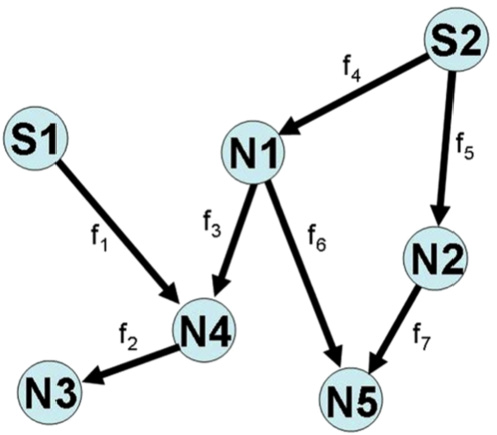

Let $d_i$ be a positive scalar denoting the power demand for node $i;$ assume that this demand must be met exactly.                                                                            
The capacity of the power supply stations is denoted by S.                                           
Power supply stations must run at capacity.                                                                                         
For each arrow, let $f_j$ be the power flow along that arrow.                                         
Negative flow implies that power is running in the opposite direction of the arrow.                

Write a function `my_flow_calculator(S,d)` where S is a 1×2 vector representing the capacity
of each power supply station, and d is a 1×5 row vector representing the demands at each node
(i.e., d[0] is the demand at node 1).                                                                         
The output argument, f, should be a 1×7 row vector denoting the flows in the network (i.e., $f[0] = f_1$ in the diagram).                                                                           
The flows contained in $f$ should satisfy all the constraints of the system, like power generation and demands.                                                                                              
Note that there may be more than one solution to the system of equations.                             
The total flow into a node must equal the total flow out of the node plus the demand;                  
that is, for each node $i, f_{inflow} = f_{outflow} + d_i$ . You may assume that $\sum S_j =\sum d_i .$

In [23]:
def my_flow_calculator(S, d):
    # Number of nodes and power supply stations
    num_nodes = len(d)
    num_supply_stations = len(S)

    # Construct the coefficient matrix A and the demand vector b
    A = np.zeros((num_nodes, num_nodes + num_supply_stations))
    b = np.zeros((num_nodes, 1))

    # Assign coefficients to A and b
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                A[i, j] = -1  # Coefficient for outflow from node i
            elif i in (j - 1, j + 1):
                A[i, j] = 1  # Coefficient for inflow to node i
        b[i] = d[i]  # Demand at node i

    # Add additional constraints for power supply stations
    for j in range(num_supply_stations):
        A[j, num_nodes + j] = -1  # Coefficient for outflow from power supply station j
        b[j] = S[j]  # Capacity of power supply station j

    # Solve the linear system of equations
    f = np.linalg.lstsq(A, b, rcond=None)[0].flatten()

    display(Math(r'f = '+latex(Matrix(f))))
    return None

In [24]:
S = [10, 15]
d = [5, 2, 7, 8, 5]

my_flow_calculator(S, d)

<IPython.core.display.Math object>